
## Observations and Insights 

In [6]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata_df, study_results_df, how='inner', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_df = combined_results_df['Mouse ID'].drop_duplicates()
print(len(mice_df))

249


In [8]:
# Getting duplicates difference between Maouse ID and Timepoint 
combined_results_df.loc[combined_results_df.duplicated(subset =['Mouse ID','Timepoint'],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Ask Sam tomorrow***
combined_results_df[['Mouse ID','Timepoint']].drop_duplicates()

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mid = combined_results_df.loc[combined_results_df['Mouse ID']!='g989']
duplicate_mid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=duplicate_mid.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
duplicate_mid['Mouse ID'].nunique()

248

## Summary Statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

combined_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
combined_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
combined_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
combined_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
combined_results_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})
sum=combined_results_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})
sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [132]:
# Let's check the total number of measurements taken on each drug regimen 
data_dr = combined_results_df['Drug Regimen'].value_counts()
data_dr

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


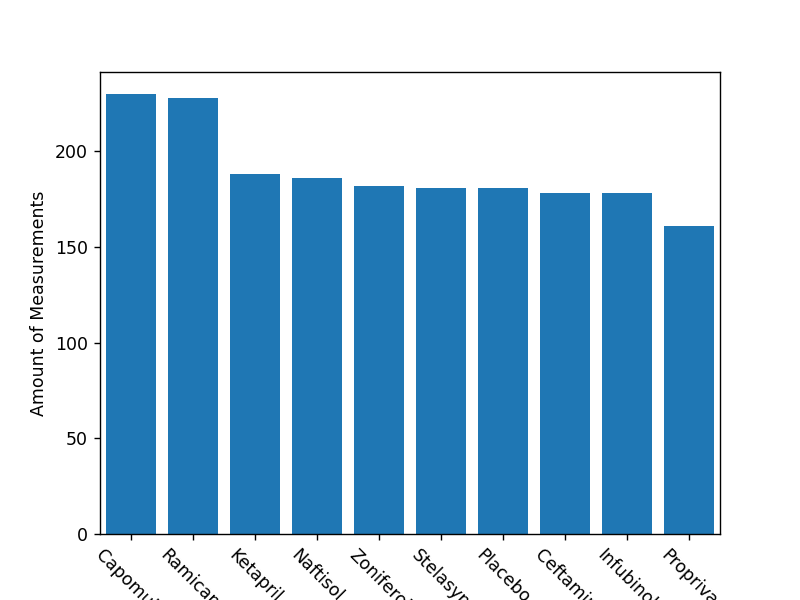

<AxesSubplot:>

In [133]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
data_dr.plot(kind='bar')


In [134]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(data_dr.index,data_dr.values)
plt.xticks(rotation=-45)
plt.xlabel('Drug Regimen')
plt.ylabel('Amount of Measurements')

Text(47.902777777777786, 0.5, 'Amount of Measurements')

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

clean_df

labels = ["Females", "Males"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to seperate the Females from Males 
explode = (0.1, 0, )

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ValueError: 'label' must be of length 'x'

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times = combined_results_df.groupby('Mouse ID',as_index=False)['Timepoint'].max().rename(columns={'Timepoint': 'Max_Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_times.merge(combined_results_df)


,Mouse ID,Max_Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1888,z969,45,Naftisol,Male,9,30,25,63.145652,2
1889,z969,45,Naftisol,Male,9,30,30,65.841013,3
1890,z969,45,Naftisol,Male,9,30,35,69.176246,4
1891,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [162]:
# Put treatments into a list for for loop (and later for plot labels)

drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in drugs:
    

#drug='Capomulin'
    tmp=combined_results_df.loc[combined_results_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    quartiles=tmp.quantile([.25,.5,.75])
    lower_bound=quartiles[.25]
    upper_bound=quartiles[.75]
    iqr=upper_bound-lower_bound
    upper_outlier=upper_bound+(1.5*iqr)
    lower_outlier=lower_bound-(1.5*iqr)
    outliers=tmp.loc[(tmp>upper_outlier) | (tmp<lower_outlier)]
    print(f"outliers for {drug}: {outliers}" )

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [166]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = mouse_metadata_df[5,:]
average_tumor = study_results_df[3,:]
correlation = st.pearsonr(mouse_weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: '(5, slice(None, None, None))' is an invalid key